In [1]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data

df = pd.read_csv('D:/data_files/layoffs.csv')

In [3]:
df.shape

(1821, 9)

In [4]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,TuSimple,San Diego,Transportation,700.0,0.50,2022-12-16,IPO,United States,648.0
1,Tomorrow,Hamburg,Finance,30.0,0.25,2022-12-16,Unknown,Germany,29.0
2,Improbable,London,Other,NaN,0.10,2022-12-16,Unknown,United Kingdom,704.0
3,SonderMind,Denver,Healthcare,NaN,0.15,2022-12-16,Series C,United States,183.0
4,Freshworks,SF Bay Area,Support,90.0,0.02,2022-12-15,IPO,United States,484.0


In [5]:
#Check for null values

df.isna().sum()

company                  0
location                 0
industry                 6
total_laid_off         546
percentage_laid_off    592
date                     1
stage                    4
country                  0
funds_raised           134
dtype: int64

## *Data Cleaning*

In [7]:
#Deleting columns

df = df.drop(['percentage_laid_off','funds_raised','stage'],axis=1)

#replacing null values: NULL Industry with Unknown value and total_laid_off with 1 
df['industry'] = df['industry'].fillna('Unknown')
df['total_laid_off'] = df['total_laid_off'].fillna(1)

In [8]:
df.dropna(subset=['date'],inplace=True)

In [9]:
df.shape

(1820, 6)

In [10]:
#Change data type of total_laid_off column

df['total_laid_off'] = df['total_laid_off'].astype('int64')

## *Analysis of global layoffs data*

<AxesSubplot:title={'center':'Top 10 countries affected by layoffs'}, xlabel='total_laid_off', ylabel='country'>

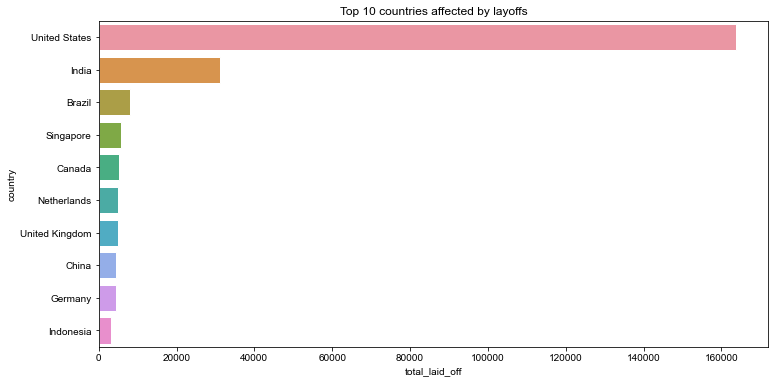

In [12]:
# Top 10 countries affected by layoffs

top_countries = df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

top_countries = top_countries.reset_index()

plt.figure(figsize=(12, 6))
plt.title("Top 10 countries affected by layoffs")

sns.set(style="white",palette="Accent")

sns.barplot(data = top_countries,x="total_laid_off",y="country")


**United States is affected the most by layoffs**

<AxesSubplot:title={'center':'Top 10 industries affected by layoffs'}, xlabel='industry', ylabel='total_laid_off'>

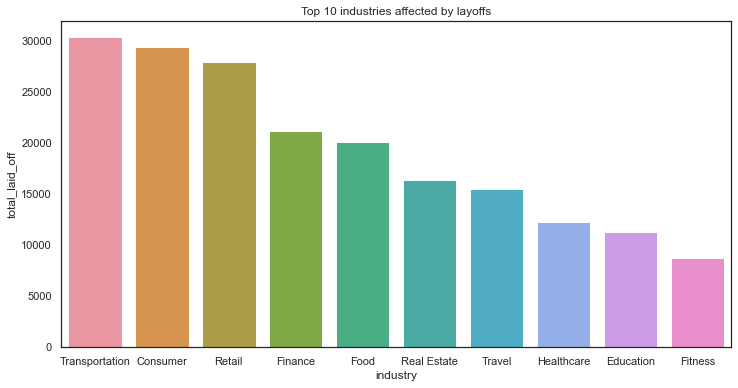

In [13]:
# Top 10 industries affected by layoffs

top_industries = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

top_industries = top_industries.reset_index()

plt.figure(figsize=(12, 6))
plt.title("Top 10 industries affected by layoffs")
sns.set(style="white", palette="Accent")

sns.barplot(data = top_industries,x="industry",y="total_laid_off")

**Most affected industries worldwide by layoffs are: Transportation, Consumer, Retail, Finance and Food**

<AxesSubplot:title={'center':'Top 10 locations affected by layoffs'}, xlabel='location', ylabel='total_laid_off'>

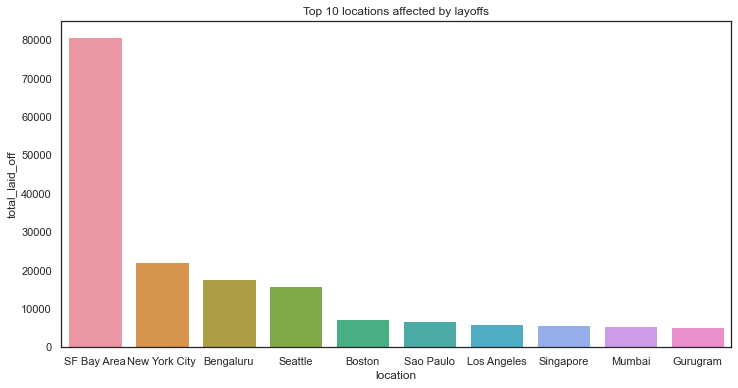

In [14]:
# Top locations affected by layoffs 

top_locations = df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head(10)
top_locations = top_locations.reset_index()

plt.figure(figsize=(12, 6))
plt.title("Top 10 locations affected by layoffs")
sns.set(style="white", palette="Accent")

sns.barplot(data = top_locations,x="location",y="total_laid_off")

**Most affected location by layoffs is SF Bay Area. Benagaluru is the third most city affected by layoffs**

<AxesSubplot:title={'center':'Top 10 companies that laid off'}, xlabel='company', ylabel='total_laid_off'>

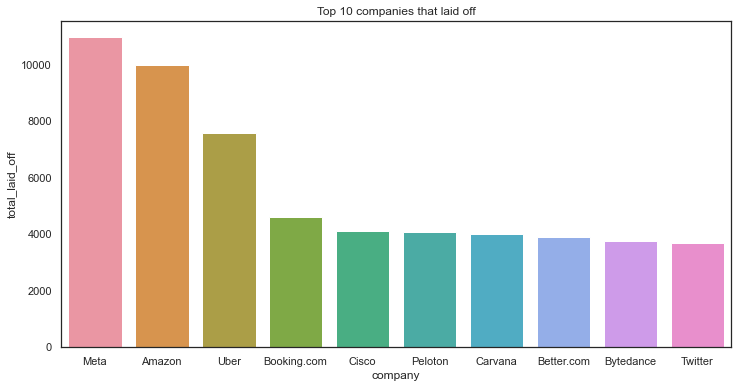

In [15]:
# Top 10 comapnies that laid off 

top_companies = df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)

top_companies = top_companies.reset_index()

plt.figure(figsize=(12, 6))
plt.title("Top 10 companies that laid off")
sns.set(style="white", palette="Accent")

sns.barplot(data = top_companies,x="company",y="total_laid_off")

**So, Meta is with highest number of layoffs followed by Amazon, Uber, Booking and Cisco**                                       

In [40]:
# Adding a year column for yearly analysis
df['year'] = pd.DatetimeIndex(df['date']).year

In [41]:
df

,company,location,industry,total_laid_off,date,country,year
0,TuSimple,San Diego,Transportation,700,2022-12-16,United States,2022
1,Tomorrow,Hamburg,Finance,30,2022-12-16,Germany,2022
2,Improbable,London,Other,1,2022-12-16,United Kingdom,2022
3,SonderMind,Denver,Healthcare,1,2022-12-16,United States,2022
4,Freshworks,SF Bay Area,Support,90,2022-12-15,United States,2022
...,...,...,...,...,...,...,...
1815,Service,Los Angeles,Travel,1,2020-03-16,United States,2020
1816,HopSkipDrive,Los Angeles,Transportation,8,2020-03-13,United States,2020
1817,Panda Squad,SF Bay Area,Consumer,6,2020-03-13,United States,2020
1818,Tamara Mellon,Los Angeles,Retail,20,2020-03-12,United States,2020


In [42]:
df_2022 = df[df['year'] == 2022]
df_2021 = df[df['year'] == 2021]
df_2020 = df[df['year'] == 2020]

In [43]:
# Count of layoffs in each year 
df['year'].value_counts()

2022    1144
2020     633
2021      43
Name: year, dtype: int64

<AxesSubplot:title={'center':'Distribution of layoffs in 2020,2021,2022'}, xlabel='year', ylabel='total_laid_off'>

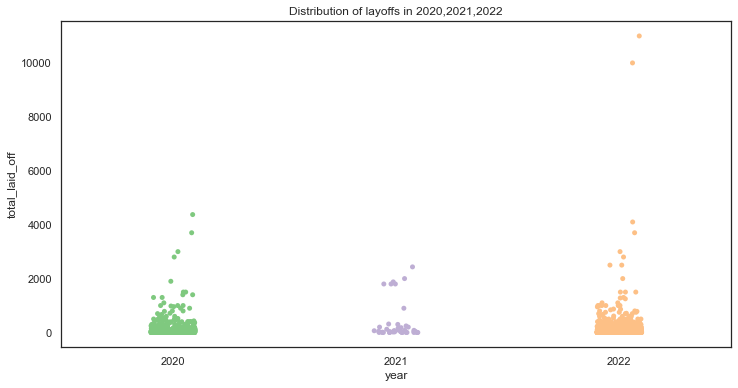

In [44]:
#Distribution of total_laid_off across 2020, 2021 and 2022
plt.figure(figsize=(12, 6))
plt.title("Distribution of layoffs in 2020,2021,2022")
sns.set(style="white", palette="Accent")
sns.stripplot(data=df,x="year",y="total_laid_off")

## *Total layoffs by year*

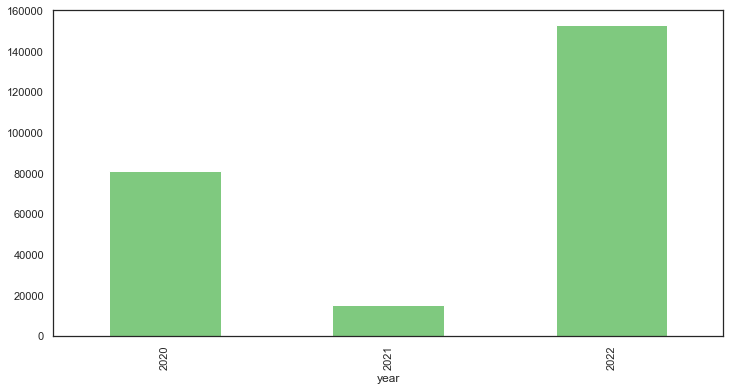

In [45]:
layoffs_by_year = df.groupby("year")['total_laid_off'].sum().plot(figsize=(12,6), kind='bar', title='', colormap='Accent')


**Chart shows that year 2022 has highest number of layoffs and 2021 year has the lowest. Layoffs in 2021 dipped considerably from year 2020.**

## *Analysing layoffs in India*

In [46]:
#getting data specific to India
df_india = df[df['country'] == 'India']
df_india

,company,location,industry,total_laid_off,date,country,year
24,PharmEasy,Mumbai,Healthcare,1,2022-12-10,India,2022
35,Swiggy,Bengaluru,Food,250,2022-12-08,India,2022
49,Vedantu,Bengaluru,Education,385,2022-12-07,India,2022
79,OYO,Gurugram,Travel,600,2022-12-03,India,2022
80,HealthifyMe,Bengaluru,Fitness,150,2022-12-03,India,2022
...,...,...,...,...,...,...,...
1685,Acko,Mumbai,Finance,45,2020-04-01,India,2020
1717,FabHotels,New Delhi,Travel,80,2020-03-30,India,2020
1731,TravelTriangle,Gurugram,Travel,250,2020-03-28,India,2020
1758,Fareportal,Gurugram,Travel,200,2020-03-26,India,2020


<AxesSubplot:title={'center':'Top 10 industries affected by layoffs in India'}, xlabel='industry', ylabel='total_laid_off'>

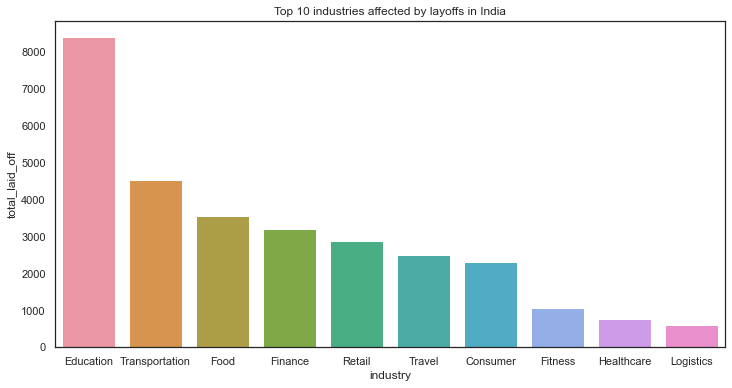

In [47]:
#Top 10 industries affected by layoffs in India

top_industries_india = df_india.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)
top_industries_india = top_industries_india.reset_index()


plt.figure(figsize=(12, 6))
plt.title("Top 10 industries affected by layoffs in India")
sns.set(style="white", palette="Accent")

sns.barplot(data = top_industries_india,x="industry",y="total_laid_off")


**Education industry is affected most by layoffs in India**

<AxesSubplot:title={'center':'Top 10 location affected by layoffs in India'}, xlabel='location', ylabel='total_laid_off'>

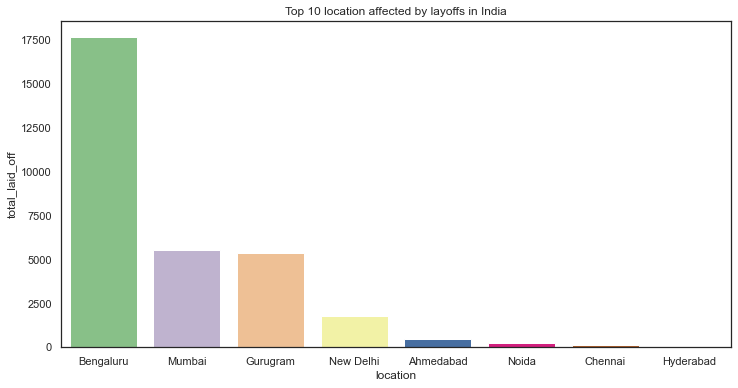

In [48]:
#Top 10 locations affected by layoffs in India

top_locations_india = df_india.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head(10)
top_locations_india = top_locations_india.reset_index()


plt.figure(figsize=(12, 6))
plt.title("Top 10 location affected by layoffs in India")
sns.set(style="white", palette="Accent")

sns.barplot(data = top_locations_india,x="location",y="total_laid_off")

**Bengaluru city is affected most by layoffs followed by Mumbai and Gurugram with almost same number of layoffs**

<AxesSubplot:title={'center':'Top 10 companies that laid off in India'}, xlabel='company', ylabel='total_laid_off'>

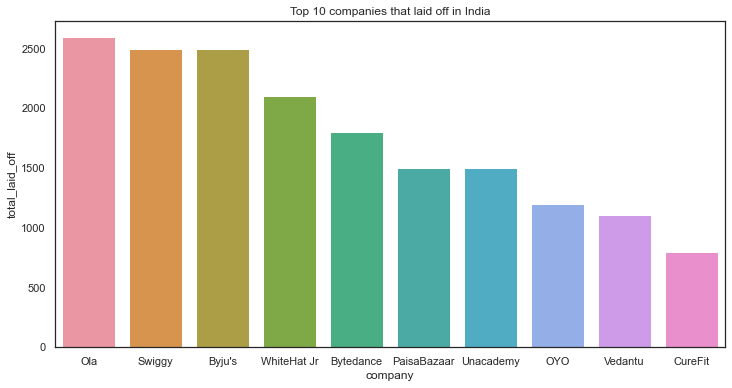

In [49]:
#Top 10 companies that laid off in India

top_companies_india = df_india.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)
top_companies_india = top_companies_india.reset_index()


plt.figure(figsize=(12, 6))
plt.title("Top 10 companies that laid off in India")
sns.set(style="white", palette="Accent")

sns.barplot(data = top_companies_india,x="company",y="total_laid_off")

**Ola laid off most employees in India**

<AxesSubplot:title={'center':'Industries affected by layoffs yearly in India'}, xlabel='industry', ylabel='total_laid_off'>

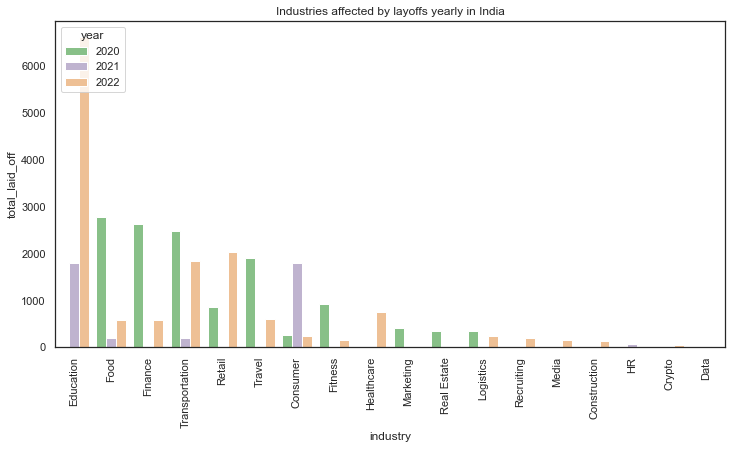

In [55]:
#Industries affected by layoffs in 2020, 2021 and 2022 in India
industries_india = df_india.groupby(['industry','year'])['total_laid_off'].sum()
industries_india = industries_india.reset_index()


plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title("Industries affected by layoffs yearly in India")
sns.set(style="white", palette="Accent")

sns.barplot(data = industries_india.sort_values(by=['total_laid_off','year'], ascending=False),x="industry",y="total_laid_off",hue="year")

**Chart shows that:
Education industry that has highest number of layoffs in India, is affected highly in 2022. It has almost no layoffs in 2020. 
Most of the industries were affected by layoffs in 2020 and 2022 with only a few getting hit hard in 2021.**

<AxesSubplot:title={'center':'Locations affected by layoffs yearly in India'}, xlabel='location', ylabel='total_laid_off'>

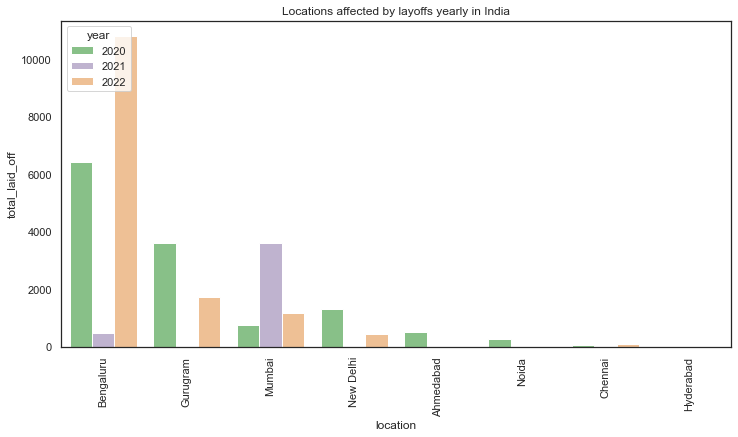

In [56]:
#Locations affected by layoffs in 2020, 2021 and 2022 in India
location_india = df_india.groupby(['location','year'])['total_laid_off'].sum()
location_india = location_india.reset_index()


plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title("Locations affected by layoffs yearly in India")
sns.set(style="white", palette="Accent")

sns.barplot(data = location_india.sort_values(by=['total_laid_off','year'], ascending=False),x="location",y="total_laid_off",hue="year")

**Bengaluru was highly affected by layoffs in 2020 and 2022. Infact layoffs got worse in Bengaluru in 2022. On the other hand, layoffs in Gurugram reduced in 2022. Mumbai is the only city that got affected most in 2021.**

<AxesSubplot:title={'center':'Yearly layoffs by companies in India'}, xlabel='company', ylabel='total_laid_off'>

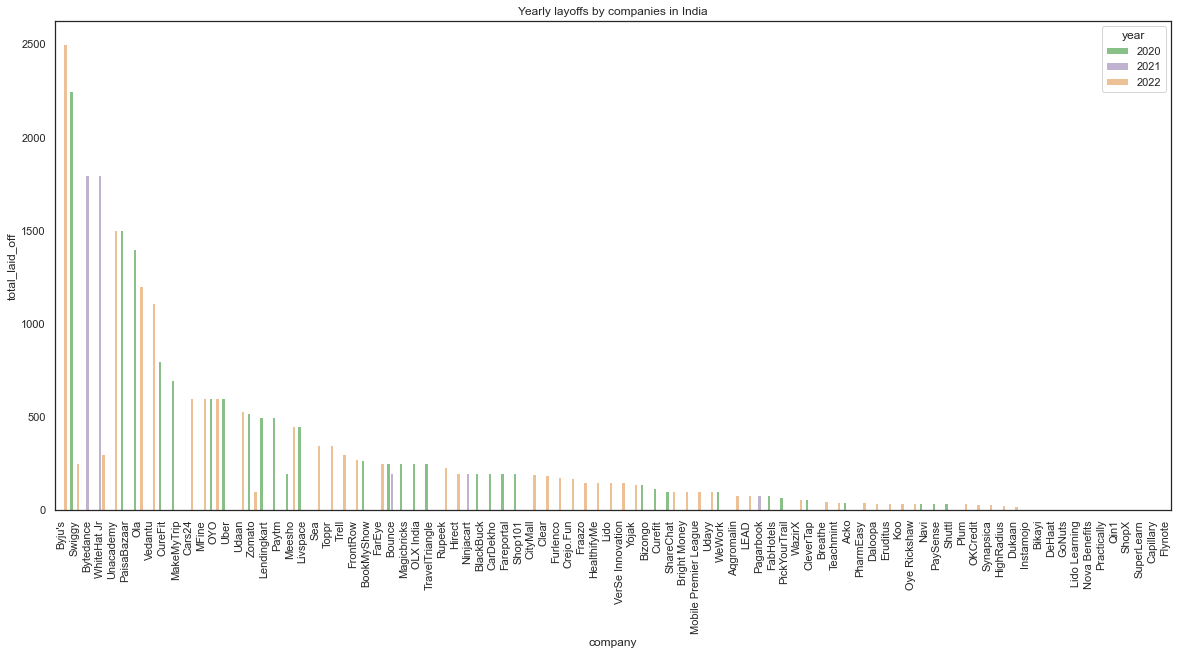

In [59]:
#Companies affected by layoffs in 2020, 2021 and 2022 in India
companies_india = df_india.groupby(['company','year'])['total_laid_off'].sum()
companies_india = companies_india.reset_index()


plt.figure(figsize=(20, 9))
plt.xticks(rotation=90)
plt.title("Yearly layoffs by companies in India")
sns.set(style="white", palette="Accent")

sns.barplot(data = companies_india.sort_values(by=['total_laid_off','year'], ascending=False),x="company",y="total_laid_off",hue="year")

**Most of the companies laid off their employees in 2020 and 2022. Byju's has laid off the most in 2022. Whereas Swiggy laid off highest number of employees in 2020 and reduced layoffs considerably in 2022. Bytedance and WhiteHat Jr seem to have most number of layoffs in 2021 which greatly reduced in 2022. Ola which contributes to highest number of layoffs in India has laid off huge number of employees in both 2020 and 2022, with slighly less number of layoffs in 2022. There are few companies that laid off only in year 2020 or in year 2022.**